# Week 7 - Temporal models 

Hello again. Welcome to week 7! In this week, we will focus on how to model time-dependent response (or target) variables (continuous or discrete!) in STAN/Pyro.

## Part 1: Linear dynamical system - Ancestral sampling

The usual imports...

In [2]:
!pip install pyro-ppl
!pip install numpyro

     |████████████████████████████████| 713 kB 10.3 MB/s 
     |████████████████████████████████| 283 kB 9.5 MB/s 


In [13]:
import numpy as np
from matplotlib import pyplot as plt

# fix random generator seed (for reproducibility of results)
np.random.seed(42)

# matplotlib options
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 10)

In this part, we will use ancestral sampling to sample observations from a simple linear dynamical system:

\begin{align}
\beta &\sim \mathcal{N}(0, 0.1)\\
z_t &\sim \mathcal{N}(\beta \, z_{t-1}, \tau^2)\\
y_t &\sim \mathcal{N}(z_t, \sigma^2)
\end{align}

Again, the purpose of these is for you to get familiar with the modelling assumption in such a model and to make sure that you understand them. Furthermore, in most cases, a great thing to do for debugging your STAN implementation of a model is to use ancestral sampling to generate some data from the model, and then try to recover the latent variables in using STAN. 

In this particular case, we would a) sample beta and some y's using ancestral sampling, and then try to b) use STAN to recover beta from the observations y (inference). We recommend you to do b) as your **home work**, since the remaining notebooks today involve only real data, ok?





Ok, lets do the ancestral sampling for a time-series of length $T=20$ using the simple model described above. 

We assume the values of tau and sigma to be given. 

Notice that we also need to assign a prior to the first latent state $z_0$, e.g. $z_0 \sim \mathcal{N}(0,1)$. Why is that?

In [44]:
# assume sigma and tau to be fixed
tau = 0.1
print("tau:", tau)
sigma = 0.05
print("sigma:", sigma)

# length of the time-series
T = 20

z = np.zeros(T) # vector to store sampled latent states
y = np.zeros(T) # vector to store sampled observations


# sample coefficient
beta = np.random.normal(0, 0.01)
print(f'beta: {beta}')

# Assign prior for first latent space
z[0] = np.random.normal(0,1)
for i in range(1,T):
  z[i] = np.random.normal(beta*z[i-1], tau)
print(f'z: {z}')

y = np.random.normal(z, sigma)

print(f'y: {y}')


tau: 0.1
sigma: 0.05
beta: -0.009043166251044087
z: [ 0.63859246 -0.1719269  -0.00505322 -0.12105592 -0.06408888  0.00531943
 -0.08608944 -0.03767703  0.10097    -0.05860228  0.08409916 -0.11373121
  0.05400891  0.14366845 -0.24846367 -0.07744263  0.05840754 -0.02083273
  0.03730298 -0.06073586]
y: [ 0.64292195 -0.17971077  0.05333589 -0.10833488 -0.04720875 -0.01527441
 -0.11046975 -0.05930494  0.12069261 -0.0796515   0.0985879  -0.00996117
  0.09756514  0.12736727 -0.18840297 -0.0978464  -0.04349869 -0.07123704
 -0.05623661 -0.07831153]


Lets visualize the data that you've just generated:

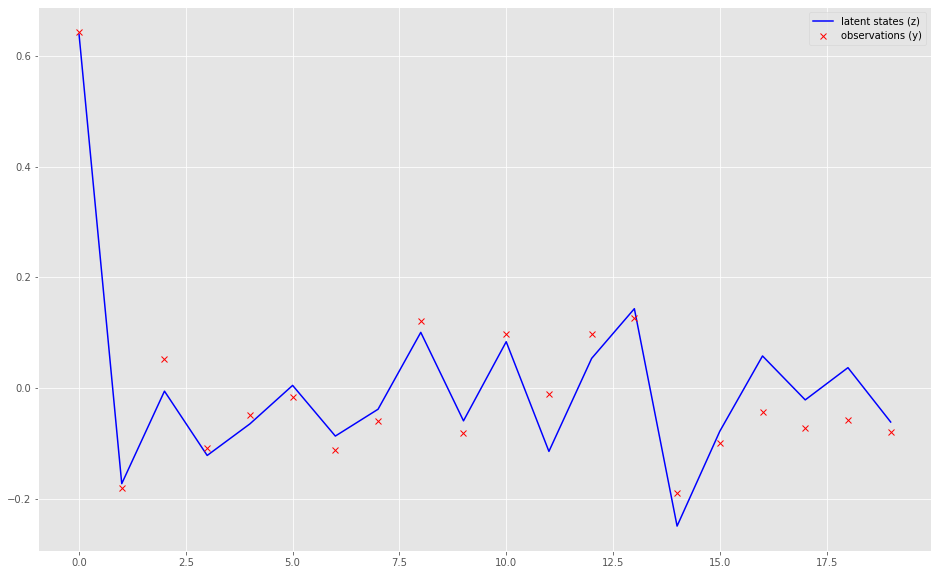

In [45]:
plt.plot(range(T), z, "b-")
plt.plot(range(T), y, "rx")
plt.legend(["latent states (z)", "observations (y)"])
plt.show()

Run the ancestral sampling code several times and look at the different results that you get. Also, make sure to play with the priors.